##Importing libraries

In [0]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Loading the data file

In [14]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [15]:
root_path = 'gdrive/My Drive/'
raw_data = pd.read_csv(root_path+'Interventions_Crime_Property_Merge.csv')
raw_data.head()

,Unnamed: 0,Unnamed: 0.1,LAT_3sigFig,LONG_3sigFig,Month,Year,QUART,CATEGORIE_TotalCrime,CATG_Vol,CATG_Mort,CATG_Autre,Avg. Annee Construction,Avg. Etage Hors Sol,Avg. Nombre Logement,Avg. Superficie Batiment,Avg. Superficie Terrain,CIV,Caserne,CREATION_DATE_TIME,DESCRIPTION_GROUPE,Division,INCIDENT_NBR,INCIDENT_TYPE_DESC,LATITUDE,LONGITUDE,MTM8_X,MTM8_Y,Municipality Final,Municipality-ID-Final,Nom Arrond,Nom Ville,Nombre Unites,Day,Hour,Day_of_week,season,weekDayEnd
0,0,0.0,45.455,-73.548,2.0,2015.0,soir,25.0,0.0,0.0,25.0,1974.91,1.637366,2.203775,1263.790000,348.532711,1.0,67,2015-02-27 23:45:00,0.0,5,21538,6,45.454947,-73.547853,301057.3,5035003.0,Verdun,83.0,Verdun,Montréal,5.0,27.0,23.0,4.0,1.0,weekDay
1,1,1.0,45.583,-73.572,3.0,2015.0,jour,18.0,0.0,0.0,18.0,1979.04,1.755194,2.727049,465.824565,729.701940,1.0,22,2015-03-07 11:12:00,0.0,8,24143,3,45.583442,-73.572020,299180.0,5049284.2,Saint-Léonard,85.0,Saint-Léonard,Montréal,1.0,7.0,11.0,5.0,1.0,WeekEnd
2,2,5.0,45.506,-73.556,12.0,2018.0,jour,11.0,10.0,0.0,1.0,1973.08,1.589981,2.448150,1698.620000,332.610361,NaN,20,2018-12-05 13:15:00,0.0,6,119159,3,45.506489,-73.556366,300395.5,5040731.3,Ville-Marie,52.0,Ville-Marie,Montréal,1.0,5.0,13.0,2.0,4.0,weekDay
3,3,22.0,45.515,-73.559,7.0,2017.0,nuit,8.0,0.0,0.0,8.0,1973.08,1.589981,2.448150,1698.620000,332.610361,1.0,20,2017-07-03 03:12:00,0.0,6,65724,3,45.515457,-73.558931,300195.8,5041728.1,Ville-Marie,52.0,Ville-Marie,Montréal,1.0,3.0,3.0,0.0,3.0,weekDay
4,4,22.0,45.515,-73.559,7.0,2017.0,nuit,8.0,0.0,0.0,8.0,1973.08,1.589981,2.448150,1698.620000,332.610361,1.0,20,2017-07-15 00:59:00,0.0,6,70188,3,45.515457,-73.558931,300195.8,5041728.1,Ville-Marie,52.0,Ville-Marie,Montréal,1.0,15.0,0.0,5.0,3.0,WeekEnd


Neural Network Model using Adabound Optimizer

In [16]:
root_path = 'gdrive/My Drive/'
raw_data = pd.read_csv(root_path+'Interventions_Crime_Property_Merge.csv')
raw_data.head()

,Unnamed: 0,Unnamed: 0.1,LAT_3sigFig,LONG_3sigFig,Month,Year,QUART,CATEGORIE_TotalCrime,CATG_Vol,CATG_Mort,CATG_Autre,Avg. Annee Construction,Avg. Etage Hors Sol,Avg. Nombre Logement,Avg. Superficie Batiment,Avg. Superficie Terrain,CIV,Caserne,CREATION_DATE_TIME,DESCRIPTION_GROUPE,Division,INCIDENT_NBR,INCIDENT_TYPE_DESC,LATITUDE,LONGITUDE,MTM8_X,MTM8_Y,Municipality Final,Municipality-ID-Final,Nom Arrond,Nom Ville,Nombre Unites,Day,Hour,Day_of_week,season,weekDayEnd
0,0,0.0,45.455,-73.548,2.0,2015.0,soir,25.0,0.0,0.0,25.0,1974.91,1.637366,2.203775,1263.790000,348.532711,1.0,67,2015-02-27 23:45:00,0.0,5,21538,6,45.454947,-73.547853,301057.3,5035003.0,Verdun,83.0,Verdun,Montréal,5.0,27.0,23.0,4.0,1.0,weekDay
1,1,1.0,45.583,-73.572,3.0,2015.0,jour,18.0,0.0,0.0,18.0,1979.04,1.755194,2.727049,465.824565,729.701940,1.0,22,2015-03-07 11:12:00,0.0,8,24143,3,45.583442,-73.572020,299180.0,5049284.2,Saint-Léonard,85.0,Saint-Léonard,Montréal,1.0,7.0,11.0,5.0,1.0,WeekEnd
2,2,5.0,45.506,-73.556,12.0,2018.0,jour,11.0,10.0,0.0,1.0,1973.08,1.589981,2.448150,1698.620000,332.610361,NaN,20,2018-12-05 13:15:00,0.0,6,119159,3,45.506489,-73.556366,300395.5,5040731.3,Ville-Marie,52.0,Ville-Marie,Montréal,1.0,5.0,13.0,2.0,4.0,weekDay
3,3,22.0,45.515,-73.559,7.0,2017.0,nuit,8.0,0.0,0.0,8.0,1973.08,1.589981,2.448150,1698.620000,332.610361,1.0,20,2017-07-03 03:12:00,0.0,6,65724,3,45.515457,-73.558931,300195.8,5041728.1,Ville-Marie,52.0,Ville-Marie,Montréal,1.0,3.0,3.0,0.0,3.0,weekDay
4,4,22.0,45.515,-73.559,7.0,2017.0,nuit,8.0,0.0,0.0,8.0,1973.08,1.589981,2.448150,1698.620000,332.610361,1.0,20,2017-07-15 00:59:00,0.0,6,70188,3,45.515457,-73.558931,300195.8,5041728.1,Ville-Marie,52.0,Ville-Marie,Montréal,1.0,15.0,0.0,5.0,3.0,WeekEnd


In [0]:
# Drop a few columns:
#   'Unnamed: 0'           ...artifact from the tableau preparation?
#   'Unnamed: 0.1'         ...artifact from the tableau preparation?
#   'CIV'                  ...I don't know what that one is and it has a lot of NaNs!
#   'CREATION_DATE_TIME'   ...was split into 'Year', 'Month', 'Day' and 'Hour'
#   'LATITUDE'             ...duplicate with 'LAT_3sigFig'
#   'LONGITUDE'            ...duplicate with 'LONG_3sigFig'
#   'MTM8_X'               ...duplicate with 'LAT_3sigFig'
#   'MTM8_Y'               ...duplicate with 'LONG_3sigFig'
#   'Municipality Final'   ...equivalent to 'Municipality-ID-Final'
#   'Nom Arrond'           ...duplicate with 'Municipality Final'
#   'Nom Ville'            ...duplicate with 'Municipality Final'
#   'INCIDENT_NBR'         ...no need ID
#   'Caserne'              ...no need Caserne
#   'Division'             ...no need Division
#   'INCIDENT_TYPE_DESC'   ...no need INCIDENT_TYPE_DESC



prepared_data = raw_data.drop(['Unnamed: 0', 'Unnamed: 0.1', 'CIV', 'CREATION_DATE_TIME', 'LATITUDE', 'LONGITUDE', 'MTM8_X', 'MTM8_Y', 'Municipality Final', 'Nom Arrond', 'Nom Ville', 'INCIDENT_NBR', 'Caserne', 'Division', 'INCIDENT_TYPE_DESC'], axis=1)

In [18]:
# Crime data can be set to 0 when there is no data
prepared_data['CATEGORIE_TotalCrime'].fillna(0, inplace=True)
prepared_data['CATG_Vol'].fillna(0, inplace=True)
prepared_data['CATG_Mort'].fillna(0, inplace=True)
prepared_data['CATG_Autre'].fillna(0, inplace=True)

# Drop rows that still contain NaNs
prepared_data = prepared_data.dropna(axis=0, how='any')

# Lets see where we're at...
prepared_data.isna().sum()

LAT_3sigFig                 0
LONG_3sigFig                0
Month                       0
Year                        0
QUART                       0
CATEGORIE_TotalCrime        0
CATG_Vol                    0
CATG_Mort                   0
CATG_Autre                  0
Avg. Annee Construction     0
Avg. Etage Hors Sol         0
Avg. Nombre Logement        0
Avg. Superficie Batiment    0
Avg. Superficie Terrain     0
DESCRIPTION_GROUPE          0
Municipality-ID-Final       0
Nombre Unites               0
Day                         0
Hour                        0
Day_of_week                 0
season                      0
weekDayEnd                  0
dtype: int64

In [0]:
# Some columns need to be factorized
prepared_data['QUART'], uniques_quart = pd.factorize(prepared_data['QUART'])
prepared_data['weekDayEnd'], uniques_weekday = pd.factorize(prepared_data['weekDayEnd'])

In [20]:
prepared_data.head()

,LAT_3sigFig,LONG_3sigFig,Month,Year,QUART,CATEGORIE_TotalCrime,CATG_Vol,CATG_Mort,CATG_Autre,Avg. Annee Construction,Avg. Etage Hors Sol,Avg. Nombre Logement,Avg. Superficie Batiment,Avg. Superficie Terrain,DESCRIPTION_GROUPE,Municipality-ID-Final,Nombre Unites,Day,Hour,Day_of_week,season,weekDayEnd
0,45.455,-73.548,2.0,2015.0,0,25.0,0.0,0.0,25.0,1974.91,1.637366,2.203775,1263.790000,348.532711,0.0,83.0,5.0,27.0,23.0,4.0,1.0,0
1,45.583,-73.572,3.0,2015.0,1,18.0,0.0,0.0,18.0,1979.04,1.755194,2.727049,465.824565,729.701940,0.0,85.0,1.0,7.0,11.0,5.0,1.0,1
2,45.506,-73.556,12.0,2018.0,1,11.0,10.0,0.0,1.0,1973.08,1.589981,2.448150,1698.620000,332.610361,0.0,52.0,1.0,5.0,13.0,2.0,4.0,0
3,45.515,-73.559,7.0,2017.0,2,8.0,0.0,0.0,8.0,1973.08,1.589981,2.448150,1698.620000,332.610361,0.0,52.0,1.0,3.0,3.0,0.0,3.0,0
4,45.515,-73.559,7.0,2017.0,2,8.0,0.0,0.0,8.0,1973.08,1.589981,2.448150,1698.620000,332.610361,0.0,52.0,1.0,15.0,0.0,5.0,3.0,1


In [0]:
# Bin the prediction variable
#prepared_conditions = [
#    (prepared_data['INCIDENT_NBR'] >=0 ) & (prepared_data['INCIDENT_NBR'] < 40000 ),
#    (prepared_data['INCIDENT_NBR'] >= 40000 ) & (prepared_data['INCIDENT_NBR'] < 100000 ),
#    (prepared_data['INCIDENT_NBR'] >= 100000 )]
#prepared_choices = [0, 1, 2]
#prepared_data['INCIDENT_NBR'] = np.select(prepared_conditions, prepared_choices)

In [22]:
prepared_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1360025 entries, 0 to 1390456
Data columns (total 22 columns):
LAT_3sigFig                 1360025 non-null float64
LONG_3sigFig                1360025 non-null float64
Month                       1360025 non-null float64
Year                        1360025 non-null float64
QUART                       1360025 non-null int64
CATEGORIE_TotalCrime        1360025 non-null float64
CATG_Vol                    1360025 non-null float64
CATG_Mort                   1360025 non-null float64
CATG_Autre                  1360025 non-null float64
Avg. Annee Construction     1360025 non-null float64
Avg. Etage Hors Sol         1360025 non-null float64
Avg. Nombre Logement        1360025 non-null float64
Avg. Superficie Batiment    1360025 non-null float64
Avg. Superficie Terrain     1360025 non-null float64
DESCRIPTION_GROUPE          1360025 non-null float64
Municipality-ID-Final       1360025 non-null float64
Nombre Unites               1360025 non-n

                          LAT_3sigFig  LONG_3sigFig  ...    season  weekDayEnd
LAT_3sigFig                  1.000000      0.413859  ... -0.004247    0.002093
LONG_3sigFig                 0.413859      1.000000  ...  0.001771    0.010036
Month                       -0.003896      0.001961  ...  0.971539    0.002197
Year                         0.013211      0.061380  ... -0.028425    0.001438
QUART                        0.001543      0.005394  ... -0.002902    0.020668
CATEGORIE_TotalCrime         0.003912      0.048725  ...  0.001112   -0.000414
CATG_Vol                     0.003673      0.033860  ...  0.002836   -0.001217
CATG_Mort                    0.000086      0.002566  ...  0.000182    0.000178
CATG_Autre                   0.001487      0.038474  ...  0.000235    0.000278
Avg. Annee Construction     -0.022017     -0.122726  ... -0.001234   -0.005105
Avg. Etage Hors Sol          0.151303      0.032013  ...  0.000173    0.005554
Avg. Nombre Logement         0.303287      0.232690 

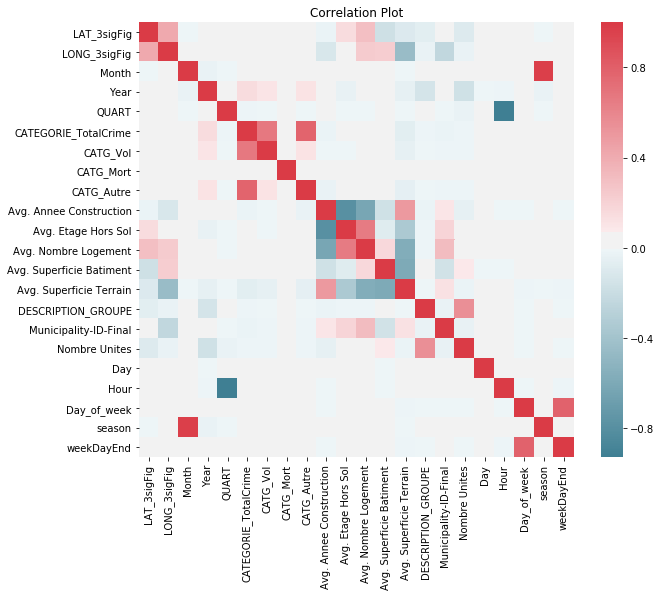

In [23]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

cor= prepared_data.corr(method='spearman')
print(cor)

import seaborn as sns
fig, ax =plt.subplots(figsize=(10, 8))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

In [0]:
#from google.colab import files
#prepared_data.to_csv('prepared_data_clean.csv') 
#files.download('prepared_data_clean.csv')

In [25]:
# Normalize the numerical data train_X

cols_to_norm = ['LAT_3sigFig', 'LONG_3sigFig','Month', 'Year', 'QUART', 'CATEGORIE_TotalCrime', 'CATG_Vol', 'CATG_Mort', 'CATG_Autre', 'Avg. Annee Construction', 'Avg. Etage Hors Sol', 'Avg. Nombre Logement', 'Avg. Superficie Batiment', 'Avg. Superficie Terrain', 'DESCRIPTION_GROUPE', 'Municipality-ID-Final', 'Nombre Unites', 'Day', 'Hour', 'Day_of_week', 'season', 'weekDayEnd' ]
prepared_data[cols_to_norm] = prepared_data[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
prepared_data.head(5)

,LAT_3sigFig,LONG_3sigFig,Month,Year,QUART,CATEGORIE_TotalCrime,CATG_Vol,CATG_Mort,CATG_Autre,Avg. Annee Construction,Avg. Etage Hors Sol,Avg. Nombre Logement,Avg. Superficie Batiment,Avg. Superficie Terrain,DESCRIPTION_GROUPE,Municipality-ID-Final,Nombre Unites,Day,Hour,Day_of_week,season,weekDayEnd
0,0.994574,0.974982,0.090909,0.769231,0.0,1.00,0.0,0.0,1.00,0.777440,0.683858,0.493554,0.538887,0.008176,0.0,0.931034,0.014599,0.866667,1.000000,0.666667,0.000000,0.0
1,0.997374,0.966280,0.181818,0.769231,0.5,0.72,0.0,0.0,0.72,0.861077,0.821242,0.708098,0.169213,0.031255,0.0,0.954023,0.000000,0.200000,0.478261,0.833333,0.000000,1.0
2,0.995690,0.972081,1.000000,1.000000,0.5,0.44,1.0,0.0,0.04,0.740381,0.628609,0.593749,0.740332,0.007212,0.0,0.574713,0.000000,0.133333,0.565217,0.333333,1.000000,0.0
3,0.995886,0.970993,0.545455,0.923077,1.0,0.32,0.0,0.0,0.32,0.740381,0.628609,0.593749,0.740332,0.007212,0.0,0.574713,0.000000,0.066667,0.130435,0.000000,0.666667,0.0
4,0.995886,0.970993,0.545455,0.923077,1.0,0.32,0.0,0.0,0.32,0.740381,0.628609,0.593749,0.740332,0.007212,0.0,0.574713,0.000000,0.466667,0.000000,0.833333,0.666667,1.0


In [0]:
from sklearn.model_selection import train_test_split
train_data ,test_data = train_test_split(prepared_data,test_size=0.3)

In [0]:
train_X = train_data.drop(['DESCRIPTION_GROUPE'], axis=1)
train_y = train_data[['DESCRIPTION_GROUPE']]

test_X = test_data.drop(['DESCRIPTION_GROUPE'], axis=1)
test_y = test_data[['DESCRIPTION_GROUPE']]

In [0]:
#from keras.utils import to_categorical
#train_y = to_categorical(train_y)
#test_y = to_categorical(test_y)

In [29]:
!pip install keras-adabound

In [30]:
from keras import Sequential
from keras import layers
from keras import backend as K
from keras.layers.core import Dense
from keras import regularizers
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.constraints import max_norm
from keras_adabound import AdaBound

def create_model():
    model = Sequential()
    
    # Input layer
    model.add(Dense(units = 1000, activation = 'relu', input_shape=(21,), init='normal'))
    model.add(BatchNormalization())
    # Add dropout regularization
    model.add(Dropout(rate=0.5))

    # Hidden layer
    model.add(Dense(units = 500, activation='relu', init='normal'))
    model.add(BatchNormalization())
    # Add dropout regularization
    model.add(Dropout(rate=0.4))
    
    # Output layer
    model.add(Dense(units = 1, activation='sigmoid'))

    return model

Using TensorFlow backend.


In [31]:
model_adabound = create_model()
model_adabound.summary()

W0722 23:54:48.787778 140132690847616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1000, activation="relu", input_shape=(21,), kernel_initializer="normal")`
  from ipykernel import kernelapp as app
W0722 23:54:48.812144 140132690847616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0722 23:54:48.816066 140132690847616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0722 23:54:48.889070 1401326908476

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              22000     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1000)              4000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
batch_normalization_2 (Batch (None, 500)               2000      
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 501       
Total para

In [32]:
model_adabound.compile(loss='binary_crossentropy', optimizer=AdaBound(lr=1e-3, final_lr=0.1), metrics=['accuracy'])

W0722 23:54:49.074839 140132690847616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0722 23:54:49.083898 140132690847616 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [33]:
train_X.shape

(952017, 21)

In [34]:
train_y.shape

(952017, 1)

In [35]:
h_web = model_adabound.fit(train_X, train_y, batch_size=10000, epochs=100, validation_split=0.3, shuffle=True)

Train on 666411 samples, validate on 285606 samples
Epoch 1/100
666411/666411 [==============================] - 4s 6us/step - loss: 0.6721 - acc: 0.6624 - val_loss: 0.4594 - val_acc: 0.8126
Epoch 2/100
666411/666411 [==============================] - 3s 4us/step - loss: 0.5106 - acc: 0.7840 - val_loss: 0.4441 - val_acc: 0.8154
Epoch 3/100
666411/666411 [==============================] - 3s 4us/step - loss: 0.4760 - acc: 0.8044 - val_loss: 0.4361 - val_acc: 0.8192
Epoch 4/100
666411/666411 [==============================] - 3s 4us/step - loss: 0.4478 - acc: 0.8137 - val_loss: 0.4154 - val_acc: 0.8276
Epoch 5/100
666411/666411 [==============================] - 3s 4us/step - loss: 0.4183 - acc: 0.8228 - val_loss: 0.4044 - val_acc: 0.8423
Epoch 6/100
666411/666411 [==============================] - 3s 4us/step - loss: 0.3962 - acc: 0.8321 - val_loss: 0.3942 - val_acc: 0.8487
Epoch 7/100
666411/666411 [==============================] - 3s 4us/step - loss: 0.3839 - acc: 0.8371 - val_loss: 

In [36]:
_, train_acc = model_adabound.evaluate(train_X, train_y, verbose=0)
_, test_acc = model_adabound.evaluate(test_X, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.863, Test: 0.863
